# Proyek Analisis Data: Bike-sharing
- **Nama:** Raden Alvito Raidhy Trinanda
- **Email:** alvito.raidhy21@gmail.com (Dicoding) / m011b4ky3559@bangkit.academy (Bangkit)
- **ID Dicoding:** alvitoraidhy

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara cuaca dengan jumlah sepeda yang dirental pada hari itu?
- Bagaimana hubungan antara apparent temperature dengan jumlah sepeda yang dirental pada jam itu?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [3]:
# Load the files into pandas dataframes
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengetahui gambaran dataframe dari day.csv
- Mengetahui gambaran dataframe dari hour.csv

### Assessing Data

In [5]:
# Knowing the structure of the dataframes
day_df.info(), hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

(None, None)

**Insight:**
- Mengetahui struktur dataframe dari day.csv
- Mengetahui struktur dataframe dari hour.csv

In [6]:
# Check for missing values and data types in both datasets
day_df.isna().sum(), hour_df.isna().sum()

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

**Insight:**
- Tidak ada missing value di dataframe hour.csv
- Tidak ada missing value di dataframe day.csv

In [7]:
# Check for duplicated values in both datasets
day_df.duplicated().sum(), hour_df.duplicated().sum()

(0, 0)

**Insight:**
- Tidak ada duplicated value di dataframe hour.csv
- Tidak ada duplicated value di dataframe day.csv

### Cleaning Data

In [8]:
# Converting the data type of dteday to datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Converting normalized values to their real values
day_df["temp"] = day_df["temp"] * 41
hour_df["temp"] = hour_df["temp"] * 41

day_df["atemp"] = day_df["atemp"] * 50
hour_df["atemp"] = hour_df["atemp"] * 50

day_df["hum"] = day_df["hum"] * 100
hour_df["hum"] = hour_df["hum"] * 100

day_df["windspeed"] = day_df["windspeed"] * 67
hour_df["windspeed"] = hour_df["windspeed"] * 67

day_df.info(), hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

(None, None)

**Insight:**
- Mengetahui dteday dataframe day.csv dan hour.csv dalam bentuk datetime
- Mengetahui skala asli dari variable temp, atemp, hum, dan windspeed dari dataframe day.csv dan hour.csv

In [9]:
# Convert numbers into their respoective string values
day_df.replace({
    "season": {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"},
    "weathersit": {1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
                   2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                   3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                   4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog}"}
    }, inplace=True)

hour_df.replace({
    "season": {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"},
    "weathersit": {1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
                   2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                   3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                   4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog}"}
    }, inplace=True)

In [10]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,Not Holiday,Saturday,Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,1,Not Holiday,Sunday,Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,1,Not Holiday,Monday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,1,Not Holiday,Tuesday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,1,Not Holiday,Wednesday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
 hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,Not Holiday,Saturday,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,Not Holiday,Saturday,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,Not Holiday,Saturday,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,Not Holiday,Saturday,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,Not Holiday,Saturday,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- Mengetahui nilai-nilai dataframe day.csv dengan keterangan teks
- Mengetahui nilai-nilai dataframe hour.csv dengan keterangan teks

## Exploratory Data Analysis (EDA)

### Explore day_df

In [12]:
# Get descriptive statistics for day_df
day_stats = day_df.describe(include="all")

day_stats

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,Not Holiday,Saturday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,6.519836,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,4.000000,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,7.000000,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,10.000000,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset mencakup periode dari 1 Januari 2011 hingga 31 Desember 2012, dengan total 731 pengamatan.
- Data dikategorikan menjadi empat musim, dengan "Musim Gugur" sebagai yang paling sering muncul (188 kali).
- Hari Sabtu adalah hari paling umum untuk penyewaan sepeda (105 kali).
- Data menunjukkan jumlah penyewaan yang lebih tinggi pada akhir pekan dibandingkan hari kerja, yang mungkin mencerminkan penggunaan untuk rekreasi di akhir pekan dibandingkan dengan perjalanan kerja.
- Sebagian besar pengamatan dikategorikan sebagai "Bukan Hari Libur" (710 kali), menunjukkan bahwa hari libur mungkin tidak berpengaruh signifikan pada jumlah penyewaan secara keseluruhan.
- Kelembapan rata-rata sekitar 62.8%, yang mungkin berdampak pada aktivitas penyewaan. Kelembapan yang lebih tinggi dapat mengurangi minat untuk menyewa.

### Explore hour_df

In [13]:
# Get descriptive statistics for hour_df
hour_stats = hour_df.describe(include="all")

hour_stats

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,Not Holiday,Saturday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,6.537775,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,4.000000,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,7.000000,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,10.000000,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


**Insight:**
- Dataset mencakup 17379 pengamatan
- Data terbagi menjadi empat musim, dengan "Musim Gugur" menjadi yang paling umum (4496 pengamatan).
- Sebagian besar pengamatan mencatat hari "Bukan Hari Libur" (16879 pengamatan), dengan hari Sabtu menjadi hari paling sering untuk penyewaan (2512 pengamatan).
- Hari kerja cenderung memiliki penyewaan yang lebih tinggi, menunjukkan pola penggunaan sepeda sebagai moda transportasi sehari-hari.
- Kondisi cuaca yang paling umum adalah "Cerah, Sedikit Awan, Mendung Sebagian," dengan frekuensi 11413. Cuaca yang baik cenderung mendorong lebih banyak penyewaan sepeda.
- Kelembapan rata-rata sekitar 62.7%, yang mungkin berkontribusi terhadap keputusan penyewaan, di mana kelembapan tinggi dapat mengurangi minat untuk menyewa.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara cuaca dengan jumlah sepeda yang dirental pada hari itu?

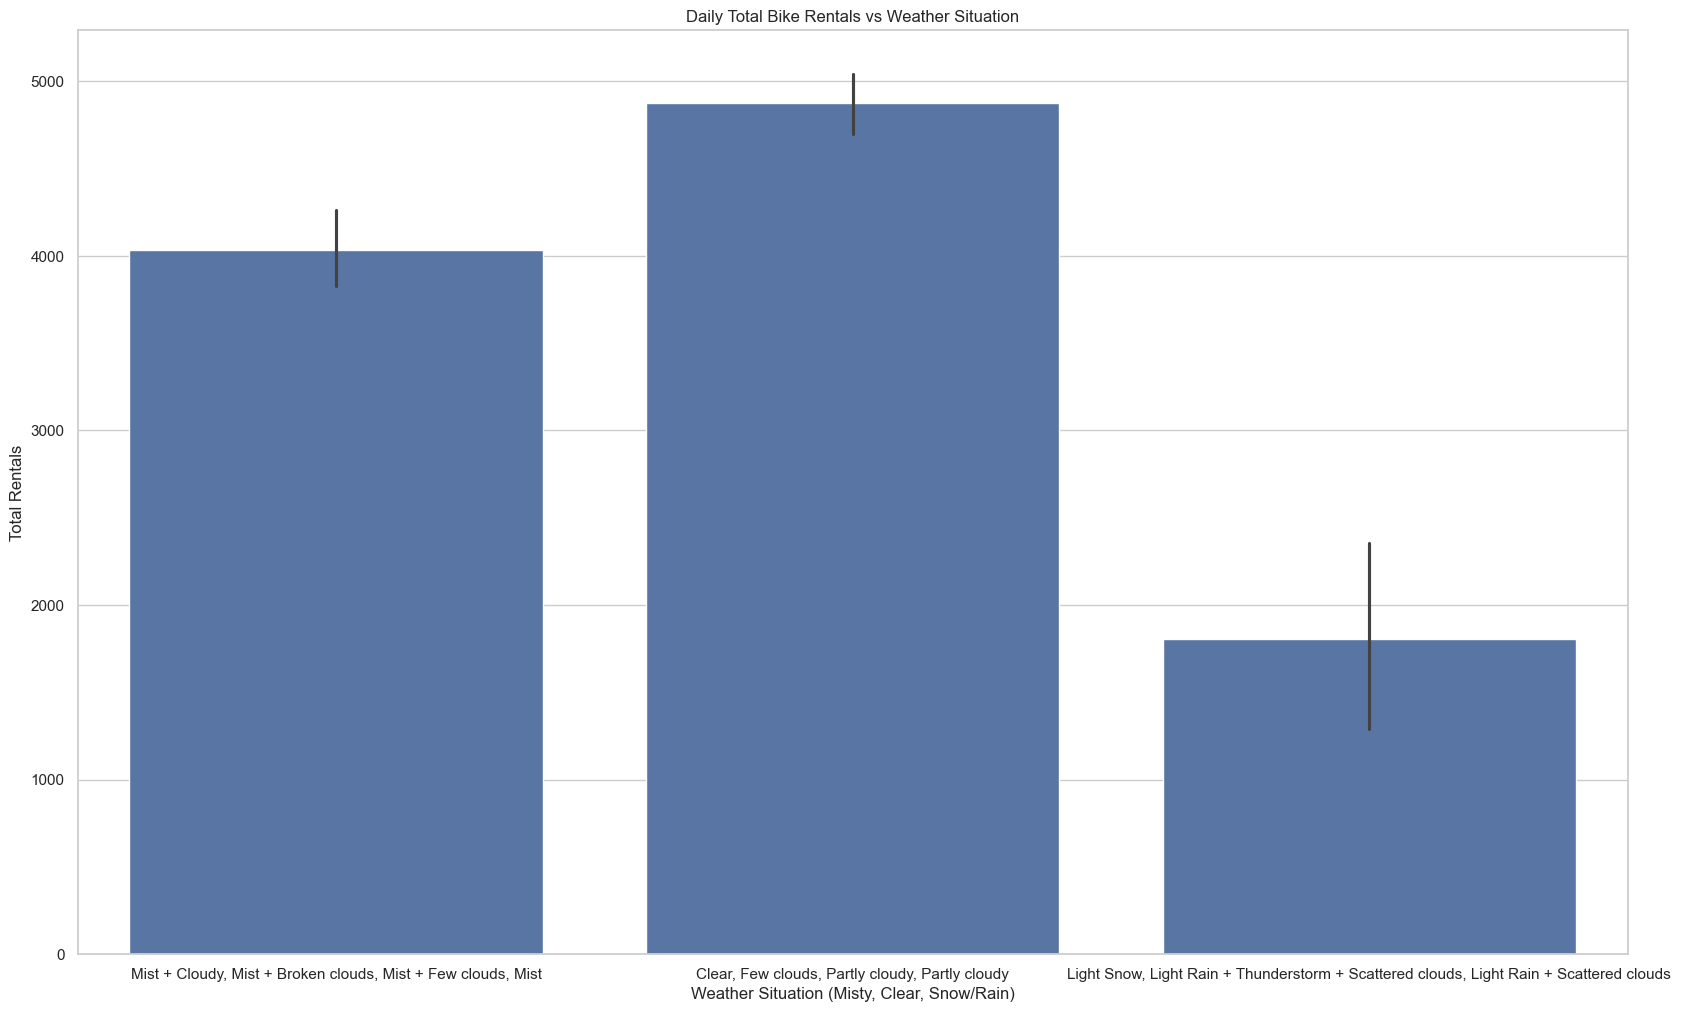

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Boxplot: Daily Total Bike Rentals vs Weather Situation
plt.figure(figsize=(20,12))
sns.barplot(x='weathersit', y='cnt', data=day_df)
plt.title("Daily Total Bike Rentals vs Weather Situation")
plt.xlabel("Weather Situation (Misty, Clear, Snow/Rain)")
plt.ylabel("Total Rentals")
plt.show()

**Insight:**
- Jumlah rental sepeda terbanyak per hari terjadi pada saat cuaca cerah/berawan tanpa kabut dan tidak hujan
- Jumlah rental sepeda terendah per hari terakhir terjadi pada saat cuaca sedang hujan

### Pertanyaan 2: Bagaimana hubungan antara apparent temperature dengan jumlah sepeda yang dirental pada jam itu?

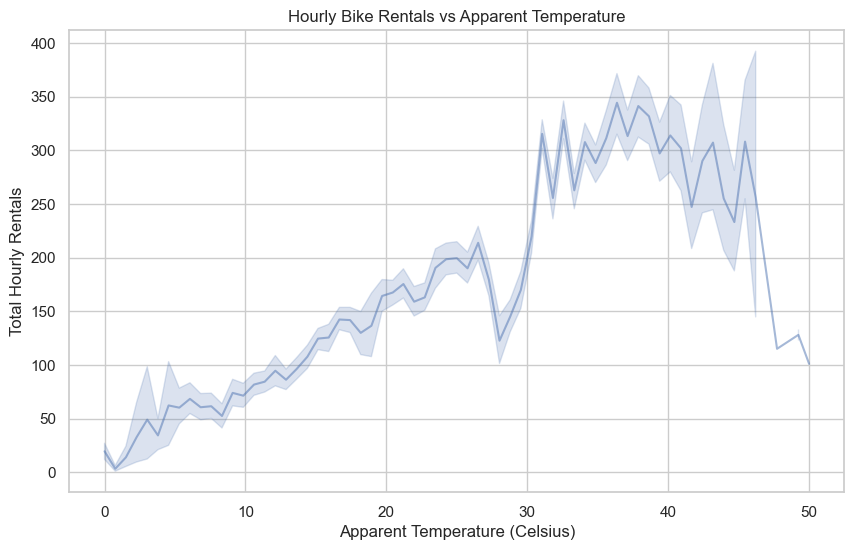

In [15]:
# Scatterplot: Hourly Bike Rentals vs Apparent Temperature
plt.figure(figsize=(10, 6))
sns.lineplot(x='atemp', y='cnt', data=hour_df, alpha=0.5)
plt.title("Hourly Bike Rentals vs Apparent Temperature")
plt.xlabel("Apparent Temperature (Celsius)")
plt.ylabel("Total Hourly Rentals")
plt.show()

**Insight:**
- Rata-rata jumlah rental sepeda terbanyak terjadi di rentang suhu 30-45 derajat celsius
- Rata-rata jumlah rental sepeda terendah terjadi di suhu mendekati 0 derajat celsius
  

## Conclusion

- Hubungan antara Cuaca dan Penyewaan Sepeda: Jumlah penyewaan sepeda akan berkurang dalam kondisi cuaca buruk seperti kabut atau salju.
- Hubungan antara Suhu Terasa dan Penyewaan Sepeda: Suhu terasa yang lebih hangat atau lebih nyaman cenderung meningkatkan jumlah penyewaan sepeda.








## Additional:

In [16]:
# Export data for streamlit dashboard
day_df.to_csv("dashboard/day_data.csv", index=False)
hour_df.to_csv("dashboard/hour_data.csv", index=False)